## Credit data regression 

#### Based on the data sources on Kaggle, we will predict the credit balance for selected ethinicity groups of credit card holder using regression analysis given other the information about them such income, credit limit, credit rating, number of card held, age and education level

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Credit data

In [2]:
Credit_data=pd.read_excel('Credit_data.xlsx', index_col=0)
# Review a sample of the data 
Credit_data.sample(5)

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
273  30.413   3690     299      2   25         15  Female     Yes      No   
98   26.067   3388     266      4   74         17  Female      No     Yes   
394  17.316   1335     138      2   65         13    Male      No      No   
121  27.241   1402     128      2   67         15  Female      No     Yes   
221  44.847   5765     437      3   53         13  Female     Yes      No   

            Ethnicity  Balance  
273             Asian      728  
98   African American      155  
394  African American        0  
121             Asian        0  
221             Asian     1246

In [3]:
# Exploring the data format
Credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [4]:
# use the function .describe() to explore unique value for each column
Credit_data.describe(include = "all")

Income         Limit      Rating       Cards         Age  \
count   400.000000    400.000000  400.000000  400.000000  400.000000   
unique         NaN           NaN         NaN         NaN         NaN   
top            NaN           NaN         NaN         NaN         NaN   
freq           NaN           NaN         NaN         NaN         NaN   
mean     45.218885   4735.600000  354.940000    2.957500   55.667500   
std      35.244273   2308.198848  154.724143    1.371275   17.249807   
min      10.354000    855.000000   93.000000    1.000000   23.000000   
25%      21.007250   3088.000000  247.250000    2.000000   41.750000   
50%      33.115500   4622.500000  344.000000    3.000000   56.000000   
75%      57.470750   5872.750000  437.250000    4.000000   70.000000   
max     186.634000  13913.000000  982.000000    9.000000   98.000000   

         Education  Gender Student Married  Ethnicity      Balance  
count   400.000000     400     400     400        400   400.000000  
unique         NaN       2       2       2          3          NaN  
top            NaN  Female      No     Yes  Caucasian          NaN  
freq           NaN     207     360     245        199          NaN  
mean     13.450000     NaN     NaN     NaN        NaN   520.015000  
std       3.125207     NaN     NaN     NaN        NaN   459.758877  
min       5.000000     NaN     NaN     NaN        NaN     0.000000  
25%      11.000000     NaN     NaN     NaN        NaN    68.750000  
50%      14.000000     NaN     NaN     NaN        NaN   459.500000  
75%      16.000000     NaN     NaN     NaN        NaN   863.000000  
max      20.000000     NaN     NaN     NaN        NaN  1999.000000

In [5]:
# replace all the object value with numbers 
mapping_1 = {'Male': 1, 'Female': 0}
mapping_2 = {'Yes': 1, 'No': 0}
mapping_3 = {'African American': 1, 'Caucasian': 2, 'Asian': 3}

Credit_data.replace({'Gender': mapping_1,'Student': mapping_2,'Married': mapping_2, 'Ethnicity': mapping_3})

Income  Limit  Rating  Cards  Age  Education Gender  Student  Married  \
1     14.891   3606     283      2   34         11   Male        0        1   
2    106.025   6645     483      3   82         15      0        1        1   
3    104.593   7075     514      4   71         11   Male        0        0   
4    148.924   9504     681      3   36         11      0        0        0   
5     55.882   4897     357      2   68         16   Male        0        1   
6     80.180   8047     569      4   77         10   Male        0        0   
7     20.996   3388     259      2   37         12      0        0        0   
8     71.408   7114     512      2   87          9   Male        0        0   
9     15.125   3300     266      5   66         13      0        0        0   
10    71.061   6819     491      3   41         19      0        1        1   
11    63.095   8117     589      4   30         14   Male        0        1   
12    15.045   1311     138      3   64         16   Male        0        0   
13    80.616   5308     394      1   57          7      0        0        1   
14    43.682   6922     511      1   49          9   Male        0        1   
15    19.144   3291     269      2   75         13      0        0        0   
16    20.089   2525     200      3   57         15      0        0        1   
17    53.598   3714     286      3   73         17      0        0        1   
18    36.496   4378     339      3   69         15      0        0        1   
19    49.570   6384     448      1   28          9      0        0        1   
20    42.079   6626     479      2   44          9   Male        0        0   
21    17.700   2860     235      4   63         16      0        0        0   
22    37.348   6378     458      1   72         17      0        0        0   
23    20.103   2631     213      3   61         10   Male        0        1   
24    64.027   5179     398      5   48          8   Male        0        1   
25    10.742   1757     156      3   57         15      0        0        0   
26    14.090   4323     326      5   25         16      0        0        1   
27    42.471   3625     289      6   44         12      0        1        0   
28    32.793   4534     333      2   44         16   Male        0        0   
29   186.634  13414     949      2   41         14      0        0        1   
30    26.813   5611     411      4   55         16      0        0        0   
..       ...    ...     ...    ...  ...        ...    ...      ...      ...   
371   35.610   6135     466      4   40         12   Male        0        0   
372   39.116   2150     173      4   75         15   Male        0        0   
373   19.782   3782     293      2   46         16      0        1        0   
374   55.412   5354     383      2   37         16      0        1        1   
375   29.400   4840     368      3   76         18      0        0        1   
376   20.974   5673     413      5   44         16      0        0        1   
377   87.625   7167     515      2   46         10      0        0        0   
378   28.144   1567     142      3   51         10   Male        0        1   
379   19.349   4941     366      1   33         19   Male        0        1   
380   53.308   2860     214      1   84         10   Male        0        1   
381  115.123   7760     538      3   83         14      0        0        0   
382  101.788   8029     574      2   84         11   Male        0        1   
383   24.824   5495     409      1   33          9   Male        1        0   
384   14.292   3274     282      9   64          9   Male        0        1   
385   20.088   1870     180      3   76         16   Male        0        0   
386   26.400   5640     398      3   58         15      0        0        0   
387   19.253   3683     287      4   57         10   Male        0        0   
388   16.529   1357     126      3   62          9   Male        0        0   
389   37.878   6827     482      2   80         13      

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000ABD4978>]],
      dtype=object)

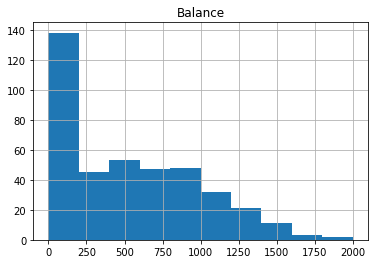

In [6]:
#Visualise the distribution of the credit balance through the histogram
Credit_data.hist(column='Balance')

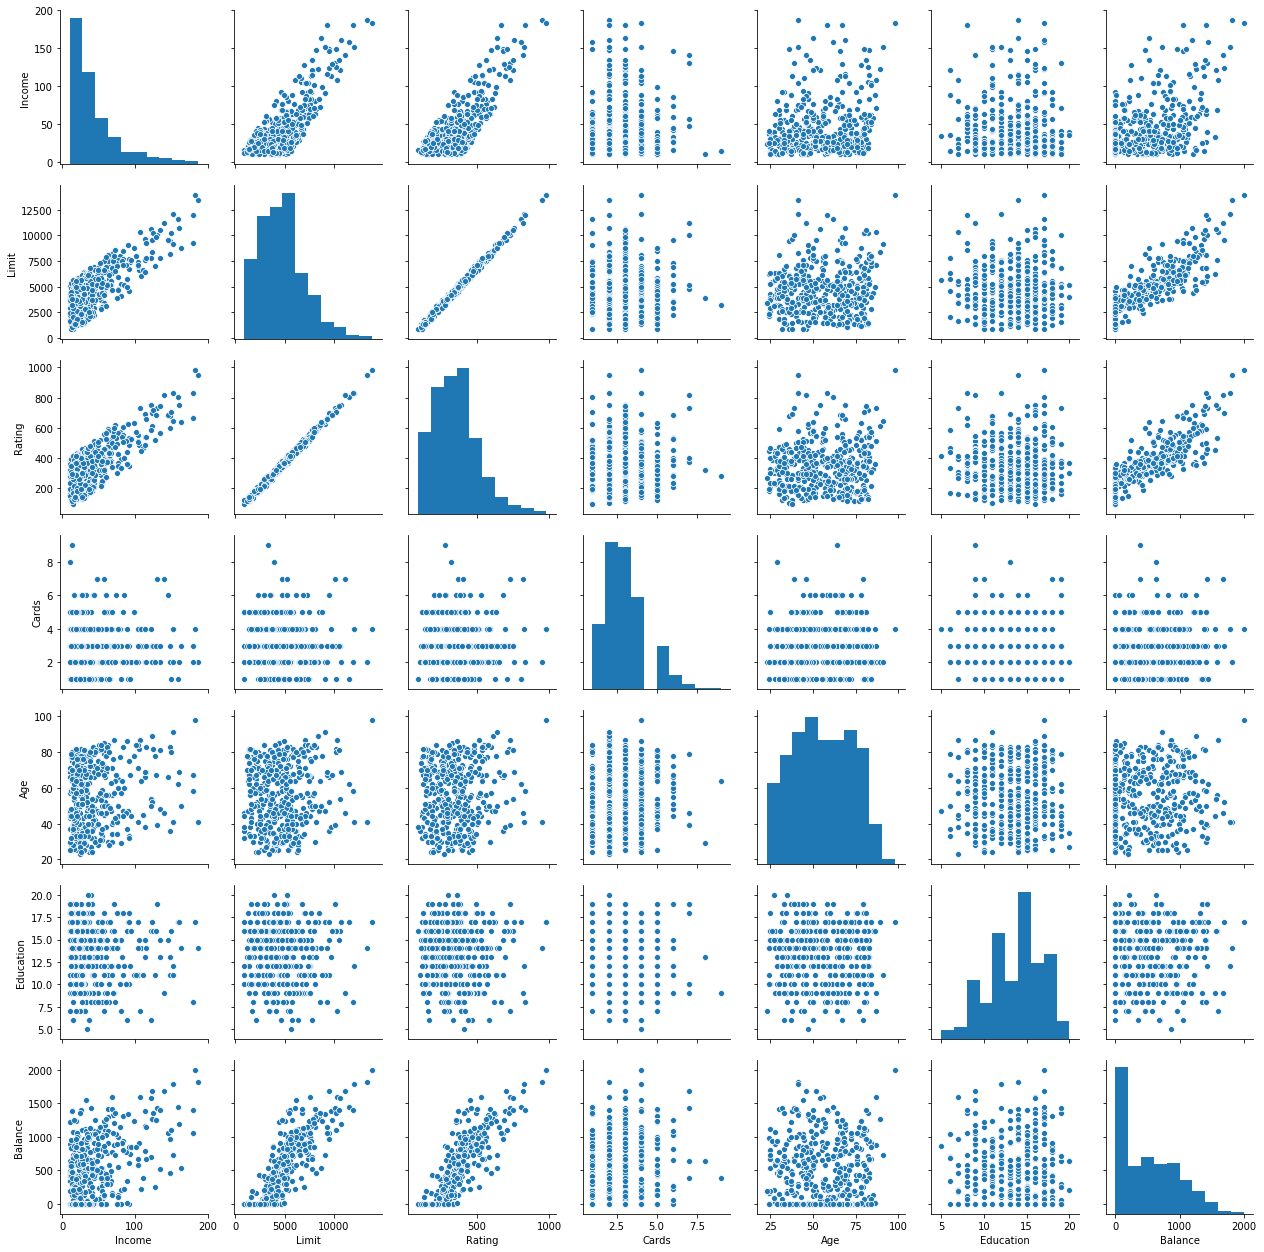

In [7]:
# visualise the correlation between any two continuous variable using the seanborn pairplot
sns.pairplot(Credit_data)

In [8]:
# Formulating the correlation matrix to determine the strength of the relation between a pair of variables
Credit_data.corr()

Income     Limit    Rating     Cards       Age  Education  \
Income     1.000000  0.792088  0.791378 -0.018273  0.175338  -0.027692   
Limit      0.792088  1.000000  0.996880  0.010231  0.100888  -0.023549   
Rating     0.791378  0.996880  1.000000  0.053239  0.103165  -0.030136   
Cards     -0.018273  0.010231  0.053239  1.000000  0.042948  -0.051084   
Age        0.175338  0.100888  0.103165  0.042948  1.000000   0.003619   
Education -0.027692 -0.023549 -0.030136 -0.051084  0.003619   1.000000   
Balance    0.463656  0.861697  0.863625  0.086456  0.001835  -0.008062   

            Balance  
Income     0.463656  
Limit      0.861697  
Rating     0.863625  
Cards      0.086456  
Age        0.001835  
Education -0.008062  
Balance    1.000000

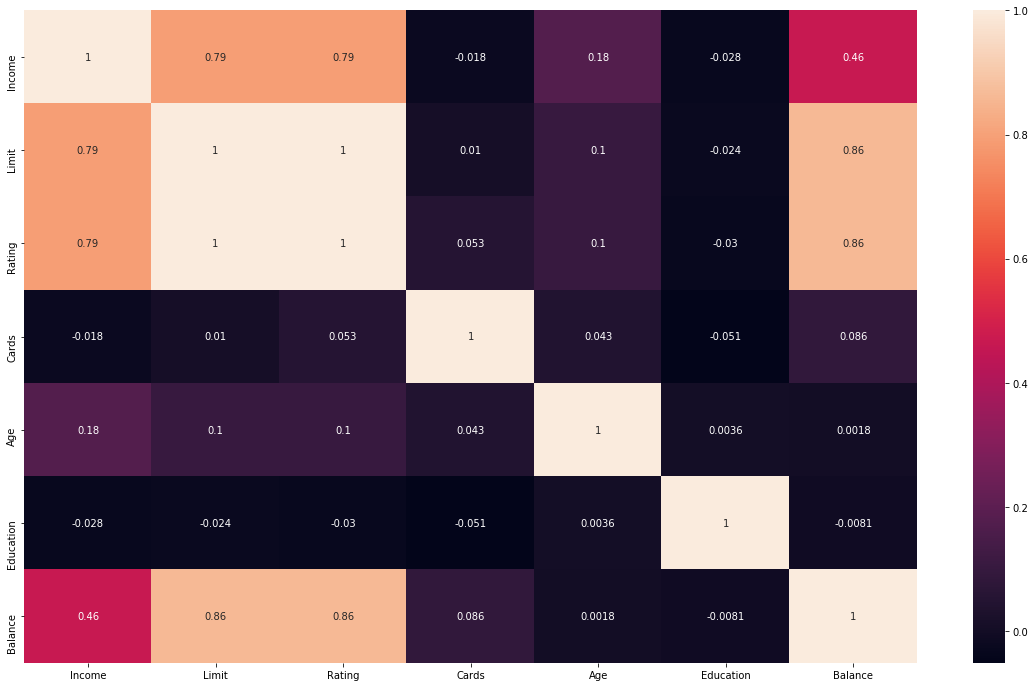

In [9]:
# Visualising the correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(Credit_data.corr(), annot=True)

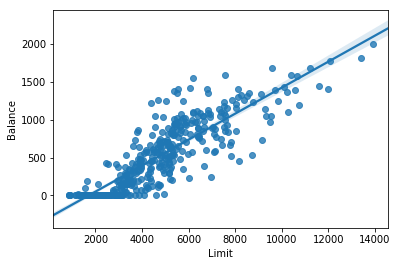

In [10]:
sns.regplot(x='Limit', y='Balance', data=Credit_data)

In [11]:
X = Credit_data[['Limit']]
y = Credit_data[['Balance']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 123)

In [12]:
print(X_train.shape, y_train.shape)

(300, 1) (300, 1)


In [13]:
print(X_test.shape, y_test.shape)

(100, 1) (100, 1)


In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn import linear_model, preprocessing

In [15]:
model = linear_model.LinearRegression(normalize=True)

In [16]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [17]:
print(model.score(X_train, y_train))

0.7262432427321539


In [18]:
y_pred=model.predict(X_test)

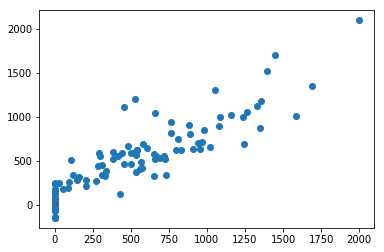

In [19]:
plt.scatter(y_test, y_pred)
plt.plot([x for x in range (9,15)], [y for y in range(9,15)], color='red')

In [20]:
X = Credit_data.drop(['Gender', 'Student', 'Married', 'Ethnicity', 'Balance'], axis=1)
X = sm.add_constant(X)
y = Credit_data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

C:\Users\t514970\AppData\Local\Continuum\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
model2 = sm.OLS(y_train, X_train)
model2_results = model2.fit()
model2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     361.0
Date:                Tue, 21 May 2019   Prob (F-statistic):          3.84e-132
Time:                        02:32:04   Log-Likelihood:                -1943.4
No. Observations:                 300   AIC:                             3901.
Df Residuals:                     293   BIC:                             3927.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -441.7120     63.151     -6.995      0.000    -565.999    -317.425
Income        -8.0620      0.435    -18.547      0.000      -8.918      -7.207
Limit          0.1747      0.063      2.763      0.006       0.050       0.299
Rating         1.4056      0.947      1.484      0.139      -0.458       3.269
Cards         13.1814      7.993      1.649      0.100      -2.549      28.912
Age           -0.8439      0.535     -1.577      0.116      -1.897       0.209
Education      0.2705      2.884      0.094      0.925      -5.406       5.946
==============================================================================
Omnibus:                       78.497   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.015
Skew:                           1.456   Prob(JB):                     3.95e-31
Kurtosis:                       4.651   Cond. No.                     3.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
y_pred = model2_results.predict(X_test)

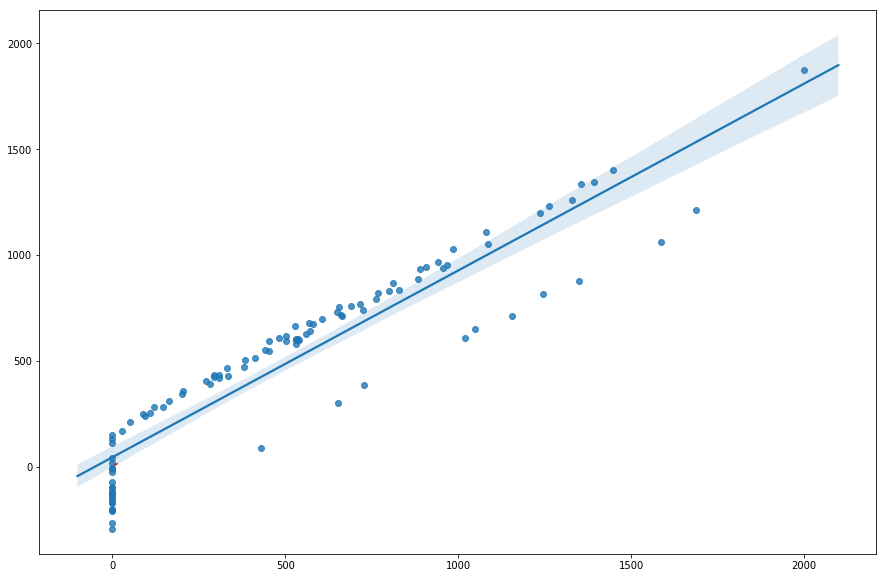

In [23]:
plt.figure(figsize=(15,10))
sns.regplot(y_test, y_pred)
plt.plot([x for x in range (9,15)], [y for y in range(9,15)], color='red')

In [24]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

y_pred = model2_results.predict(X_test)

matches = pd.DataFrame(y_test)
matches.rename(columns={'Balance':'actual'}, inplace=True)
matches['predicted'] = y_pred
matches.sample(5)

actual   predicted
212     799  828.058866
381     661  715.532545
158    1020  610.012077
201     829  834.586231
221    1246  816.600695

In [25]:
rmse(matches['predicted'], matches['actual'])

170.84688179239467

In [26]:
X = Credit_data.drop(['Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'], axis=1)
X = sm.add_constant(X)
y = Credit_data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [27]:
model3 = sm.OLS(y_train, X_train)
model3_results = model3.fit()
model3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     714.7
Date:                Tue, 21 May 2019   Prob (F-statistic):          3.35e-135
Time:                        02:32:05   Log-Likelihood:                -1946.1
No. Observations:                 300   AIC:                             3900.
Df Residuals:                     296   BIC:                             3915.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -481.0553     36.949    -13.019      0.000    -553.772    -408.339
Income        -8.2195      0.431    -19.092      0.000      -9.067      -7.372
Limit          0.1204      0.053      2.289      0.023       0.017       0.224
Rating         2.2484      0.781      2.880      0.004       0.712       3.785
==============================================================================
Omnibus:                       75.507   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.675
Skew:                           1.405   Prob(JB):                     1.55e-29
Kurtosis:                       4.649   Cond. No.                     2.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
y_pred = model3_results.predict(X_test)

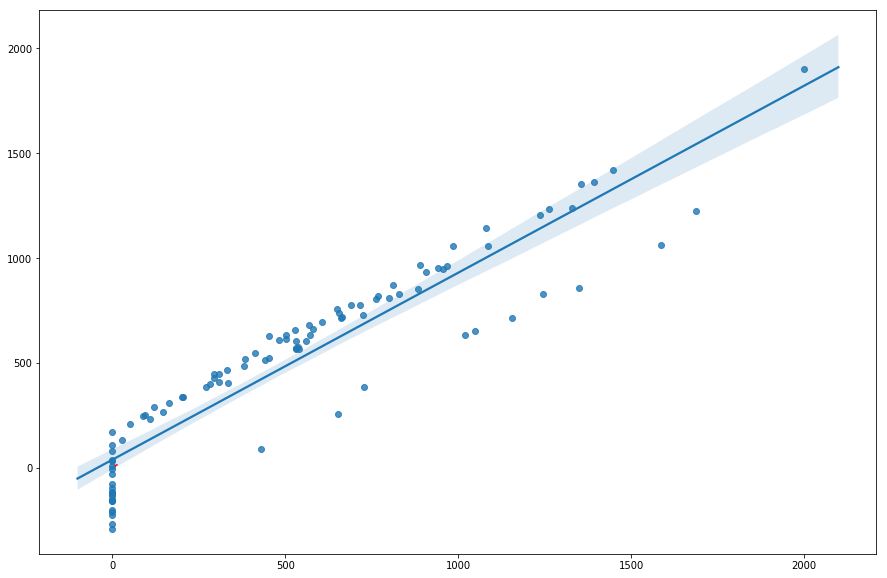

In [29]:
plt.figure(figsize=(15,10))
sns.regplot(y_test, y_pred)
plt.plot([x for x in range (9,15)], [y for y in range(9,15)], color='red')

In [30]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

y_pred = model3_results.predict(X_test)

matches = pd.DataFrame(y_test)
matches.rename(columns={'Balance':'actual'}, inplace=True)
matches['predicted'] = y_pred
matches.sample(5)

actual   predicted
115     271  386.480032
211      95  249.564608
281     541  568.048064
201     829  826.509150
32        0   82.270658

In [31]:
X = Credit_data.drop(['Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'], axis=1)
X = sm.add_constant(X)
y = Credit_data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [32]:
model4 = sm.OLS(y_train, X_train)
model4_results = model4.fit()
model4_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1042.
Date:                Tue, 21 May 2019   Prob (F-statistic):          5.47e-135
Time:                        02:32:05   Log-Likelihood:                -1950.2
No. Observations:                 300   AIC:                             3906.
Df Residuals:                     297   BIC:                             3918.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -395.7962     22.381    -17.685      0.000    -439.841    -351.752
Income        -8.2101      0.436    -18.841      0.000      -9.068      -7.353
Limit          0.2707      0.007     40.635      0.000       0.258       0.284
==============================================================================
Omnibus:                       76.558   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.326
Skew:                           1.422   Prob(JB):                     4.12e-30
Kurtosis:                       4.656   Cond. No.                     1.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
y_pred = model4_results.predict(X_test)

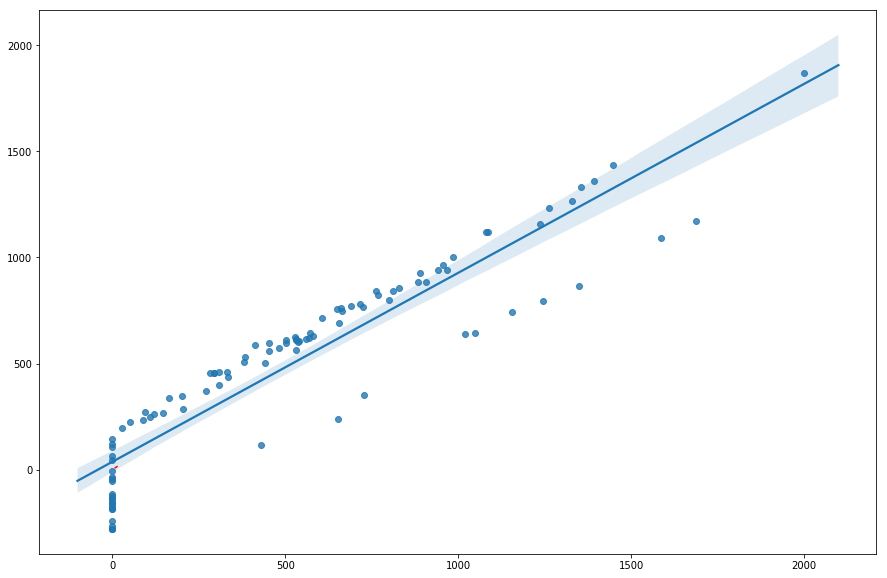

In [34]:
plt.figure(figsize=(15,10))
sns.regplot(y_test, y_pred)
plt.plot([x for x in range (9,15)], [y for y in range(9,15)], color='red')

In [35]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

y_pred = model4_results.predict(X_test)

matches = pd.DataFrame(y_test)
matches.rename(columns={'Balance':'actual'}, inplace=True)
matches['predicted'] = y_pred
matches.sample(20)

actual    predicted
377     767   824.948215
10     1350   866.734536
14     1081  1119.401958
221    1246   796.629449
284     890   925.738056
240     163   337.618729
115     271   369.255437
241     148   267.460811
21       89   233.106169
163    1086  1118.746772
238     443   500.712617
102     431   115.248388
343     204   284.315706
37      762   839.739725
148       0  -185.333981
108       0   146.390222
213     308   460.664132
7       203   348.978816
391    1393  1358.406205
32        0   106.436553

In [36]:
X = Credit_data.drop(['Limit', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'], axis=1)
X = sm.add_constant(X)
y = Credit_data[['Balance']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [37]:
model5 = sm.OLS(y_train, X_train)
model5_results = model5.fit()
model5_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1054.
Date:                Tue, 21 May 2019   Prob (F-statistic):          1.22e-135
Time:                        02:32:06   Log-Likelihood:                -1948.7
No. Observations:                 300   AIC:                             3903.
Df Residuals:                     297   BIC:                             3915.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -543.6652     25.013    -21.735      0.000    -592.891    -494.439
Income        -8.1304      0.432    -18.829      0.000      -8.980      -7.281
Rating         4.0211      0.098     40.877      0.000       3.828       4.215
==============================================================================
Omnibus:                       69.899   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.933
Skew:                           1.316   Prob(JB):                     1.49e-26
Kurtosis:                       4.607   Cond. No.                     1.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
y_pred = model5_results.predict(X_test)

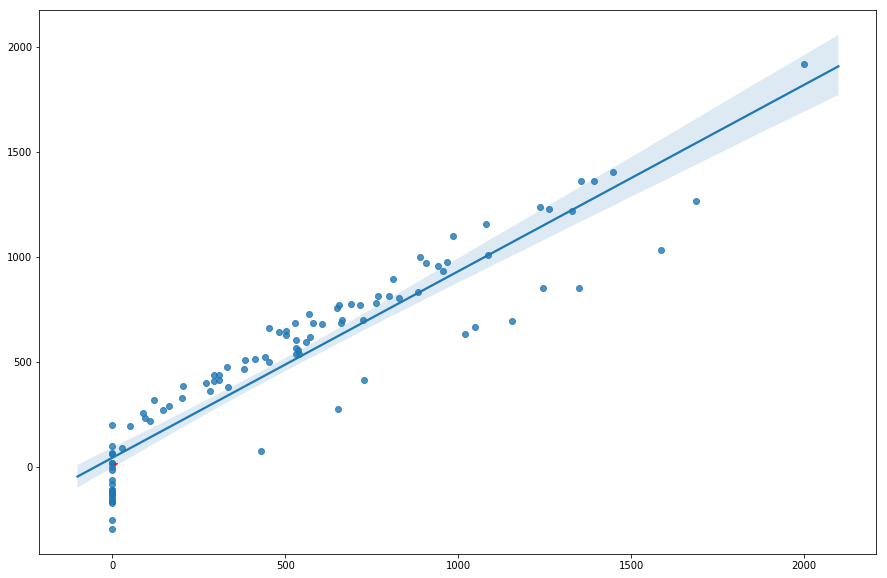

In [39]:
plt.figure(figsize=(15,10))
sns.regplot(y_test, y_pred)
plt.plot([x for x in range (9,15)], [y for y in range(9,15)], color='red')

In [40]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

y_pred = model5_results.predict(X_test)

matches = pd.DataFrame(y_test)
matches.rename(columns={'Balance':'actual'}, inplace=True)
matches['predicted'] = y_pred
matches.sample(20)

actual    predicted
10     1350   852.953376
338       0  -166.081711
249       0  -297.486040
179     453   496.791105
43      385   508.728201
211      95   233.924576
108       0   195.910998
217      52   195.051625
367    1264  1227.735523
228     482   640.771447
296       0  -166.249920
39      531   566.776111
329     121   315.701928
273     728   411.382294
83      503   647.140631
328     984  1099.328799
166     570   725.715493
102     431    74.197180
163    1086  1008.422578
12        0  -111.071393